## 3.	Regression on the tabular data


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have a file with 53 features and all data is numerical. 53 features is quite a lot, so probably we will have to use some dimensionality reduction techniques

In [2]:
df = pd.read_csv('/content/internship_train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


Let's see if there are any missing values in the table

In [3]:
df.isnull().values.any()

False

Luckily we have no missing values

In [4]:
X = df.drop(["target"], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419


In [5]:
y = df['target']
y.head()

0    20.107472
1    61.763713
2    74.651162
3    69.424645
4    66.767304
Name: target, dtype: float64

Later we will need some functions, let's define them now

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
  """Given list of scores displays the list as well as scores mean and standard deviation"""
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

    
def get_rmse(model, X, y):
  """Given model and (X,y) set calculates RMSE score of model on that set"""
  y_predicted = model.predict(X)
  rmse = mean_squared_error(y, y_predicted, squared=False)
  return rmse

Now let's scale our features using standartization and then split our set to 80% training set and 20% test set

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8)

Firstly let's try the simplest model, basic linear regression

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
get_rmse(lin_reg, X_train, y_train)

28.89767648442371

As expected, the model is too simple for that set and it is strongly underfitting. Maybe dimensionality reduction and more complex regression model could help but let's try some other regressors. For example K-nearest neighbours

In [11]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [12]:
get_rmse(neigh, X_train, y_train)

19.44927714543798

With k>1 k-nearest neighbours evaluates poorly even on the training set. So let's try something more powerful, for example Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
get_rmse(forest_reg, X_train, y_train)

0.0015390225612024627

With random forest we got a pretty good result on a training set, let's now try cross validation to check if model evaluates well

In [15]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
forest_rmse_scores = -forest_scores
display_scores(forest_rmse_scores)

Scores: [0.00528796 0.00548706 0.00529182 0.0053696 ]
Mean: 0.005359110574653513
Standard deviation: 8.073336466530342e-05


Yay, the cross validation scores are still quite good. But training takes a bit of time so if we use a grid search to tune the model it will take hours. Let's see at the importances of features, and get rid of some that have low importance

In [16]:
importances = forest_reg.feature_importances_
forest_df = pd.DataFrame({"Features": pd.DataFrame(X_train).columns, "Importances": importances})
forest_df.sort_values(by=['Importances'], ascending=False)

,Features,Importances
6,6,9.999009e-01
7,7,9.908532e-05
18,18,1.166878e-09
9,9,1.161602e-09
25,25,1.160769e-09
16,16,1.158845e-09
4,4,1.153901e-09
34,34,1.150299e-09
31,31,1.146354e-09
32,32,1.145523e-09


As we can see only 6th feature has high importance, also 7th feature has a bit of contribution to importance, so let's just leave those 2 features 

In [41]:
X_train = X_train[:, 6:8]
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
forest_rmse_scores = -forest_scores
display_scores(forest_rmse_scores)

Scores: [0.00216004 0.00213189 0.00216962 0.00216917]
Mean: 0.0021576782076209566
Standard deviation: 1.5370310305119108e-05


We can see that now we have even better score, so probably all other features where just useless for predicting target

In [43]:
get_rmse(forest_reg, X_train, y_train)

0.0006043239031507945

Since 6th feature has so much impact for target value in our model, there must be very strong correlation between them. Let's calculate Pearson correlation coefficient:

In [46]:
corr_matrix = np.corrcoef(X_train[:,0], y_train)
corr_coef = corr_matrix[0][1]
corr_coef

0.0014326216230510036

Well, Pearson correlation coefficient tells us that there is almost no correlation at all, which doesn't seem to be the case. So there is likely a non-linear correlation. Let's build a scatter plot of 6th feature agains target

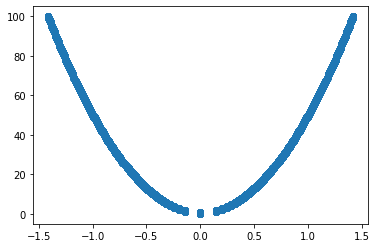

In [23]:
plt.scatter(X_train[:,0], y_train)

We can see that the 6th feature is clearly correlated but the correlation is not linear but quadratic. Knowing this we can try to build a polynomial regression of degree 2 and maybe it will work even better than random forest

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [68]:
get_rmse(poly_reg_model, poly_features, y_train)

8.399389821882722e-13

Indeed, our Polynomial Regression performs even better. Let's see if it does as good with our test set

In [71]:
poly_test_features = poly.fit_transform(X_test[:, 6:8])
get_rmse(poly_reg_model, poly_test_features, y_test)


8.395949521966867e-13

In [79]:
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[-1.60492436e-01  2.88680800e-01  4.95353033e+01 -5.32907052e-15
  1.77635684e-14]
0.49867764603619236


Yes, RMSE score is very low, so we found the model we wanted. The estimated function is:
$f(x_6, x_7) \approx 0.49867 - 0.16049 x_6 + 0.28868 x_7 + 49.53530 x_6^2$